Running AlievPanfilov2D: 100%|██████████| 7000/7000 [00:08<00:00, 814.88it/s]


   orientation  major_axis_length  minor_axis_length  axis_ratio  density_calc
0    39.935937         181.148529         172.668028    1.049114           0.0


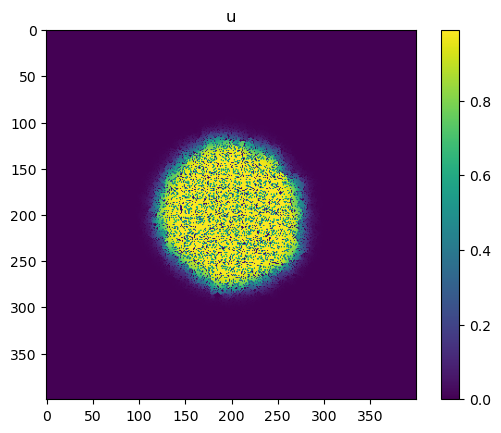

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import pandas as pd

import finitewave as fw

# number of nodes on the side
n = 400

d = 0.2
tissue = fw.CardiacTissue2D([n, n])
tissue.mesh[np.random.random([n, n]) < d] = 2

# create model object:
aliev_panfilov = fw.AlievPanfilov2D()
# set up numerical parameters:
aliev_panfilov.dt = 0.001
aliev_panfilov.dr = 0.1
aliev_panfilov.t_max = 7
# set up stimulation parameters:
stim_sequence = fw.StimSequence()
stim_sequence.add_stim(fw.StimVoltageCoord2D(0, 1, n//2 - 10, n//2 + 10,
                                            n//2 - 10, n//2 + 10))
# add the tissue and the stim parameters to the model object:
aliev_panfilov.cardiac_tissue = tissue
aliev_panfilov.stim_sequence = stim_sequence

aliev_panfilov.run()

labeled = (aliev_panfilov.u > 0.1).astype(int)
props = ski.measure.regionprops_table(labeled, properties=(
    'orientation', 'major_axis_length', 'minor_axis_length'))
props['orientation'] = np.degrees(props['orientation'])
props['axis_ratio'] = props['major_axis_length'] / props['minor_axis_length']
props['density_calc'] = (np.sum(tissue.mesh[-1:1, -1:1] == 2) 
                            / ((n - 2) * (n - 2)))

print(pd.DataFrame(props))
plt.figure()
plt.imshow(aliev_panfilov.u, cmap='viridis')
plt.colorbar()
plt.title("u")
plt.show()

In [7]:
aliev_panfilov.weights[50, 50]

array([1.1, 1.1, 0.6, 1.1, 1.1])